In [53]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.python.framework import ops
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
from PIL import Image
import random
import pickle

In [2]:
path = 'sample_data/Road_Signs_Data/bytefile'

In [3]:
categories = ['LEFT','RIGHT','STOP']
#LEFT:1,RIGT:0,STOP:2
img_size = 56

In [4]:
dbfile = open(path, 'rb')
data = pickle.load(dbfile)
dbfile.close()

In [44]:
def create_X_y (data):
    #takes a list containg training data 
    #returns X and y matrix
    X = []
    y = []
    for training_sample,lable in data :
        X.append(training_sample)
        y.append(lable)
    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y
X,y = create_X_y(data)

2


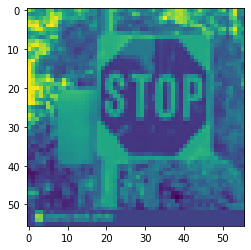

***************************


In [9]:
for i in range(0,len(y)):
  print(y[i])
  plt.imshow(X[i])
  plt.show()
  print('***************************')
  break

In [ ]:
#one_hot_encoding

In [45]:
X,y = create_X_y(data)
X = X.reshape(img_size*img_size,52)
X = X/255
y = one_hot_encoder_for_labels(y)

TensorFlow Pactice

In [ ]:
X = tf.constant(np.random.randn(3,1),name ='X')
W = tf.constant(np.random.randn(4,3),name = 'W')
b = tf.constant(np.random.randn(4,1),name= 'b')
Y = tf.add(tf.matmul(W,X),b)

In [ ]:
def sigmoid(z):
  x = tf.compat.v1.placeholder(tf.float32,name='X')
  sigmoid = tf.math.sigmoid(x)
  with tf.compat.v1.Session() as sess:
        result = sess.run(sigmoid,feed_dict = {x:z})
  return result
print(sigmoid([1,2]))

[0.7310586 0.8807971]


In [ ]:
def costfunc(logits, labels):
   z = tf.compat.v1.placeholder(tf.float32,name='z')
   y = tf.compat.v1.placeholder(tf.float32,name='y')
   cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = z,labels =y)
   with tf.compat.v1.Session() as sess:
     cost = sess.run(cost,feed_dict ={z:logits,y:labels})
   return cost

In [ ]:
logits = np.array([0.2,0.4,0.7,0.9])
labels = np.array([0,0,1,1])
cost_temp = costfunc(logits,labels)

In [ ]:
def ones(shape):
  ones = tf.ones(shape)
  with tf.compat.v1.Session() as sess:
    ones = sess.run(ones)
  return ones

In [ ]:
ones([3])

array([1., 1., 1.], dtype=float32)

In [37]:
def one_hot_encoder_for_labels (lable_array):
    #takes the raw label array 
    #return the one hot encoded
    #representation array
    unique_lables = np.unique(lable_array)
    unique_lables_count = len(unique_lables)
    sample_size = len(lable_array)
    y = []
    
    for lable in lable_array :
        temp_vector = np.zeros((unique_lables_count,1))
        index = np.where(unique_lables == lable )
        temp_vector[index] = 1
        y.append(temp_vector)
    y = np.asarray(y)
    y = y.T.reshape(unique_lables_count,sample_size)
    return y

In [18]:
def create_placeholders(n_x, n_y):
  X = tf.compat.v1.placeholder(tf.float32,[n_x,None],name='X' )
  Y = tf.compat.v1.placeholder(tf.float32,[n_y,None],name='Y' )
  return X,Y

In [48]:
def initialize_parameters():
  W1 = tf.compat.v1.get_variable("W1", [25,3136], initializer = tf.keras.initializers.GlorotUniform(seed = 1))
  b1 = tf.compat.v1.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
  W2 = tf.compat.v1.get_variable("W2", [12, 25], initializer = tf.keras.initializers.GlorotUniform(seed = 1))
  b2 = tf.compat.v1.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
  W3 = tf.compat.v1.get_variable("W3", [3, 12], initializer = tf.keras.initializers.GlorotUniform(seed = 1))
  b3 = tf.compat.v1.get_variable("b3", [3,1], initializer = tf.zeros_initializer())
  parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
  return parameters


In [50]:
tf.compat.v1.reset_default_graph()
with tf.compat.v1.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    print("W3 = " + str(parameters["W3"]))
    print("b3 = " + str(parameters["b3"]))

W1 = <tf.Variable 'W1:0' shape=(25, 3136) dtype=float32>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32>
W3 = <tf.Variable 'W3:0' shape=(3, 12) dtype=float32>
b3 = <tf.Variable 'b3:0' shape=(3, 1) dtype=float32>


In [14]:
def forward_propagation(X, parameters):
  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']
  W3 = parameters['W3']
  b3 = parameters['b3']

  Z1 = tf.add(tf.matmul(W1,X),b1)                                              # Z1 = np.dot(W1, X) + b1
  A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)
  Z2 = tf.add(tf.matmul(W2,A1),b2)                                              # Z2 = np.dot(W2, A1) + b2
  A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)
  Z3 = tf.add(tf.matmul(W3,A2),b3)

  return Z3

In [21]:
tf.compat.v1.reset_default_graph()
with tf.compat.v1.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, None), dtype=float32)


In [23]:
def compute_cost(Z3, Y):
  logits = tf.transpose(Z3)
  labels = tf.transpose(Y)
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
  return cost

In [24]:
tf.compat.v1.reset_default_graph()

with tf.compat.v1.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [87]:
def model(X_train, Y_train,num_epochs,learning_rate):
  
  ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
  #tf.set_random_seed(1)                             # to keep consistent results
  #seed = 3                                          # to keep consistent results
  (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
  n_y = Y_train.shape[0]                            # n_y : output size
  costs = []

  X, Y = create_placeholders(n_x, n_y)
  parameters = initialize_parameters()
  Z3 = forward_propagation(X, parameters)
  cost = compute_cost(Z3, Y)
  optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
  init = tf.compat.v1.global_variables_initializer()
  with tf.compat.v1.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
      _ , gradient_cost = sess.run([optimizer, cost], feed_dict={X: X_train, Y: Y_train})
      costs.append(gradient_cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per fives)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    parameters = sess.run(parameters)
    print ("Parameters have been trained!")

    correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
    print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
    #print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
  return parameters
  

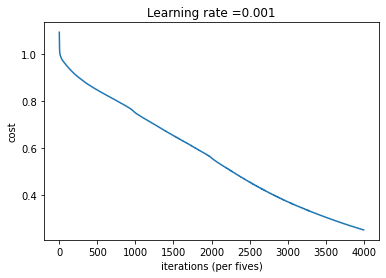

Parameters have been trained!
Train Accuracy: 0.9807692


In [88]:
trained_para = model(X,y,num_epochs=4000,learning_rate=0.001)

Place an image and check the prediction

In [130]:
def predict(X, parameters):
  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']
  W3 = parameters['W3']
  b3 = parameters['b3']

  Z1 = tf.add(tf.matmul(W1,X),b1)                                              # Z1 = np.dot(W1, X) + b1
  A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)
  Z2 = tf.add(tf.matmul(W2,A1),b2)                                              # Z2 = np.dot(W2, A1) + b2
  A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)
  Z3 = tf.add(tf.matmul(W3,A2),b3)

  sigmoid = tf.sigmoid(Z3)
  with tf.compat.v1.Session() as sess:
        result = sess.run(sigmoid)

  return result

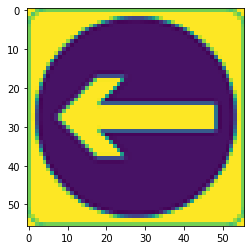

array([[0.64519686],
       [0.37880632],
       [0.6668246 ]], dtype=float32)

In [134]:
image_name = 'left.png'
test_image_path = 'sample_data/Road_Signs_Data/Test_Data/'+image_name
image = Image.open(test_image_path).convert('L')
image = image.resize((img_size,img_size))
array_image = np.array(image)

plt.imshow(array_image)
plt.show()

array_image = array_image.reshape(img_size*img_size,1)
array_image = array_image/255
predict(array_image,trained_para)

In [ ]:
categories = ['LEFT','RIGHT','STOP']
#RIGT:0,LEFT:1,STOP:2